# Simple Classification using Tensorflow

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Cancer Dataset

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

In [79]:
df = pd.read_csv('cancer_classification.csv')

## 1. Simple Exploratory Data Analysis (EDA)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [82]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

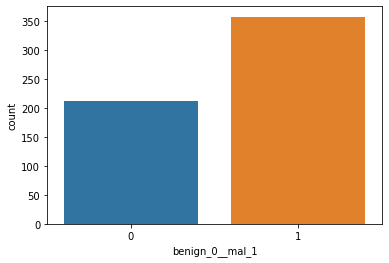

In [83]:
sns.countplot(x='benign_0__mal_1',data=df)

#### From the plot we can know that the dataset that we have more cases at malign tumor than the benign, the difference is not that extreme.

<AxesSubplot:>

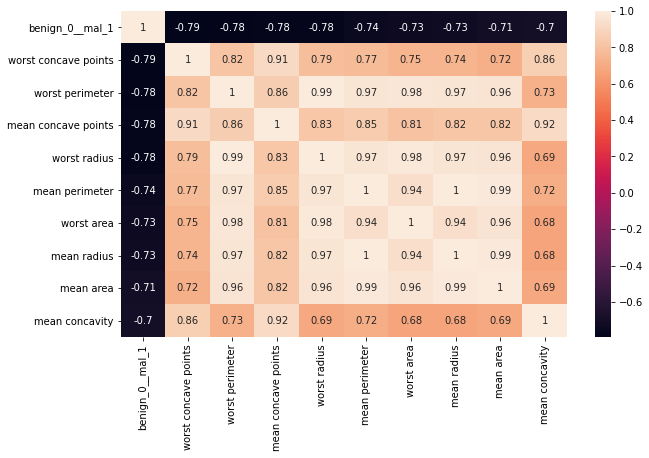

In [179]:
k = 10
plt.figure(figsize=(10,6))
cols = abs(df.corr()).sort_values('benign_0__mal_1', ascending=False).nlargest(k,'benign_0__mal_1').index
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm,annot=True,yticklabels=cols.values, xticklabels=cols.values)

#### Top 10 most correlated value both either negative or positive correlative against the classes viewed in heatmap.

<AxesSubplot:>

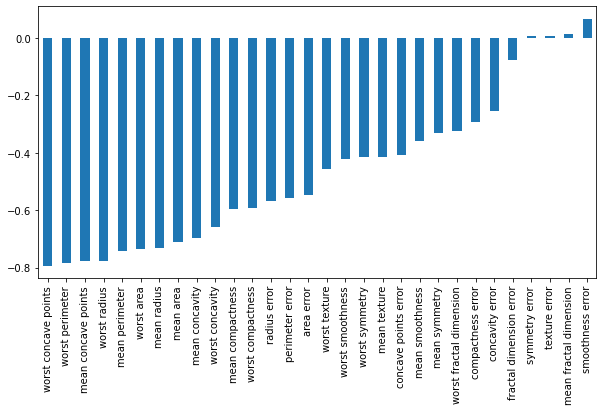

In [185]:
plt.figure(figsize=(10,5))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

#### Details of all feature of correlation, actually all majority feature has a negative correlation against the classification.

## 2. Data preparations and preprocessing

In [186]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [189]:
from sklearn.preprocessing import MinMaxScaler

In [190]:
scaler = MinMaxScaler()

In [191]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Training Data

In [192]:
from tensorflow.keras.models import Sequential

In [193]:
from tensorflow.keras.layers import Dense,Dropout

In [194]:
X_train.shape

(426, 30)

#### Specify feature number with neuron models

In [196]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary Classification using sigmoid activation
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [198]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 3s 7ms/sample - loss: 0.6713 - val_loss: 0.6538
Epoch 2/600
426/426 [==============================] - 0s 202us/sample - loss: 0.6371 - val_loss: 0.6221
Epoch 3/600
426/426 [==============================] - 0s 197us/sample - loss: 0.6056 - val_loss: 0.5895
Epoch 4/600
426/426 [==============================] - 0s 172us/sample - loss: 0.5700 - val_loss: 0.5491
Epoch 5/600
426/426 [==============================] - 0s 174us/sample - loss: 0.5248 - val_loss: 0.4967
Epoch 6/600
426/426 [==============================] - 0s 233us/sample - loss: 0.4738 - val_loss: 0.4430
Epoch 7/600
426/426 [==============================] - 0s 173us/sample - loss: 0.4230 - val_loss: 0.3925
Epoch 8/600
426/426 [==============================] - 0s 171us/sample - loss: 0.3773 - val_loss: 0.3463
Epoch 9/600
426/426 [=

Epoch 75/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0546 - val_loss: 0.1034
Epoch 76/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0541 - val_loss: 0.1041
Epoch 77/600
426/426 [==============================] - 0s 221us/sample - loss: 0.0535 - val_loss: 0.0991
Epoch 78/600
426/426 [==============================] - 0s 174us/sample - loss: 0.0537 - val_loss: 0.1016
Epoch 79/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0527 - val_loss: 0.1074
Epoch 80/600
426/426 [==============================] - 0s 236us/sample - loss: 0.0540 - val_loss: 0.0983
Epoch 81/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0583 - val_loss: 0.1059
Epoch 82/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0629 - val_loss: 0.1009
Epoch 83/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0568 - val_loss: 0.1097
Epoch 84/600
426/426 [========================

Epoch 152/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0397 - val_loss: 0.1305
Epoch 153/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0442 - val_loss: 0.1183
Epoch 154/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0400 - val_loss: 0.1297
Epoch 155/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0408 - val_loss: 0.1217
Epoch 156/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0399 - val_loss: 0.1220
Epoch 157/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0412 - val_loss: 0.1223
Epoch 158/600
426/426 [==============================] - 0s 121us/sample - loss: 0.0414 - val_loss: 0.1202
Epoch 159/600
426/426 [==============================] - 0s 125us/sample - loss: 0.0415 - val_loss: 0.1176
Epoch 160/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0410 - val_loss: 0.1285
Epoch 161/600
426/426 [==============

426/426 [==============================] - 0s 177us/sample - loss: 0.0306 - val_loss: 0.1232
Epoch 229/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0324 - val_loss: 0.1202
Epoch 230/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0309 - val_loss: 0.1395
Epoch 231/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0317 - val_loss: 0.1180
Epoch 232/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0313 - val_loss: 0.1305
Epoch 233/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0328 - val_loss: 0.1156
Epoch 234/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0322 - val_loss: 0.1256
Epoch 235/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0300 - val_loss: 0.1262
Epoch 236/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0324 - val_loss: 0.1213
Epoch 237/600
426/426 [============================

426/426 [==============================] - 0s 120us/sample - loss: 0.0266 - val_loss: 0.1233
Epoch 305/600
426/426 [==============================] - 0s 125us/sample - loss: 0.0239 - val_loss: 0.1308
Epoch 306/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0276 - val_loss: 0.1316
Epoch 307/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0289 - val_loss: 0.1199
Epoch 308/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0301 - val_loss: 0.1213
Epoch 309/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0263 - val_loss: 0.1265
Epoch 310/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0284 - val_loss: 0.1125
Epoch 311/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0239 - val_loss: 0.1421
Epoch 312/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0257 - val_loss: 0.1194
Epoch 313/600
426/426 [============================

426/426 [==============================] - 0s 133us/sample - loss: 0.0180 - val_loss: 0.1495
Epoch 381/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0179 - val_loss: 0.1191
Epoch 382/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0238 - val_loss: 0.1481
Epoch 383/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0182 - val_loss: 0.1226
Epoch 384/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0153 - val_loss: 0.1551
Epoch 385/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0201 - val_loss: 0.1289
Epoch 386/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0168 - val_loss: 0.1333
Epoch 387/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0170 - val_loss: 0.1245
Epoch 388/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0168 - val_loss: 0.1393
Epoch 389/600
426/426 [============================

426/426 [==============================] - 0s 126us/sample - loss: 0.0119 - val_loss: 0.1442
Epoch 457/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0121 - val_loss: 0.1336
Epoch 458/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0156 - val_loss: 0.1606
Epoch 459/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0321 - val_loss: 0.1342
Epoch 460/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0342 - val_loss: 0.2046
Epoch 461/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0176 - val_loss: 0.1251
Epoch 462/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0392 - val_loss: 0.2010
Epoch 463/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0283 - val_loss: 0.1412
Epoch 464/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0229 - val_loss: 0.1760
Epoch 465/600
426/426 [============================

426/426 [==============================] - 0s 167us/sample - loss: 0.0092 - val_loss: 0.1643
Epoch 533/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0092 - val_loss: 0.1509
Epoch 534/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0085 - val_loss: 0.1585
Epoch 535/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0085 - val_loss: 0.1549
Epoch 536/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0080 - val_loss: 0.1628
Epoch 537/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0078 - val_loss: 0.1586
Epoch 538/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0078 - val_loss: 0.1684
Epoch 539/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0077 - val_loss: 0.1504
Epoch 540/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0094 - val_loss: 0.1827
Epoch 541/600
426/426 [============================

In [199]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

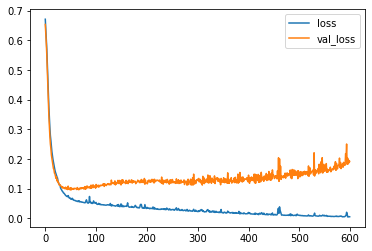

In [201]:
losses.plot()

#### This model is overfitting! Because we use 600 Epochs that is goning to be worse over and over time, therefore we want to use early stop before it gets out of hand as shown there.

## 4. Solving Overfitting (Callback and Dropout)

#### Recreate model and add callback

In [202]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary Classification using sigmoid activation
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [203]:
from tensorflow.keras.callbacks import EarlyStopping

In [204]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [205]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 5s 12ms/sample - loss: 0.6935 - val_loss: 0.6818
Epoch 2/600
426/426 [==============================] - 0s 178us/sample - loss: 0.6658 - val_loss: 0.6524
Epoch 3/600
426/426 [==============================] - 0s 154us/sample - loss: 0.6323 - val_loss: 0.6112
Epoch 4/600
426/426 [==============================] - 0s 160us/sample - loss: 0.5853 - val_loss: 0.5493
Epoch 5/600
426/426 [==============================] - 0s 160us/sample - loss: 0.5226 - val_loss: 0.4841
Epoch 6/600
426/426 [==============================] - 0s 196us/sample - loss: 0.4590 - val_loss: 0.4198
Epoch 7/600
426/426 [==============================] - 0s 156us/sample - loss: 0.4016 - val_loss: 0.3632
Epoch 8/600
426/426 [==============================] - 0s 199us/sample - loss: 0.3463 - val_loss: 0.3011
Epoch 9/600
426/426 [==============================] - 0s 173us/sample - loss: 0.2996 - val_loss: 0.2670
Epoch 10/6

Epoch 78/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0532 - val_loss: 0.0997
Epoch 79/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0516 - val_loss: 0.1172
Epoch 80/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0544 - val_loss: 0.1081
Epoch 81/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0527 - val_loss: 0.1063
Epoch 82/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0579 - val_loss: 0.1147
Epoch 83/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0536 - val_loss: 0.1134
Epoch 84/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0517 - val_loss: 0.1052
Epoch 85/600
426/426 [==============================] - 0s 233us/sample - loss: 0.0526 - val_loss: 0.1088
Epoch 86/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0505 - val_loss: 0.1050
Epoch 87/600
426/426 [========================

<AxesSubplot:>

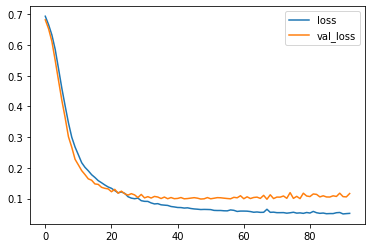

In [206]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

#### From plot we could avoid before overfitting occurs.

#### Recreate model and add Dropout Layer

#### Dropout Rate is randomly turning off neuron (around 0-1) if we put 0 it wll put off 0% of neuron randomly in opposite if 1 it will put 100% neuron randomly

In [207]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(rate=0.5))
# Binary Classification using sigmoid activation
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [208]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6636 - val_loss: 0.6497
Epoch 2/600
426/426 [==============================] - 0s 225us/sample - loss: 0.6421 - val_loss: 0.6163
Epoch 3/600
426/426 [==============================] - 0s 223us/sample - loss: 0.6360 - val_loss: 0.5888
Epoch 4/600
426/426 [==============================] - 0s 179us/sample - loss: 0.6080 - val_loss: 0.5633
Epoch 5/600
426/426 [==============================] - 0s 174us/sample - loss: 0.5971 - val_loss: 0.5436
Epoch 6/600
426/426 [==============================] - 0s 198us/sample - loss: 0.5805 - val_loss: 0.5211
Epoch 7/600
426/426 [==============================] - 0s 215us/sample - loss: 0.5664 - val_loss: 0.4986
Epoch 8/600
426/426 [==============================] - 0s 184us/sample - loss: 0.5299 - val_loss: 0.4742
Epoch 9/600
426/426 [==============================] - 0s 200us/sample - loss: 0.5233 - val_loss: 0.4540
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 205us/sample - loss: 0.1352 - val_loss: 0.0943
Epoch 79/600
426/426 [==============================] - 0s 176us/sample - loss: 0.1238 - val_loss: 0.0975
Epoch 80/600
426/426 [==============================] - 0s 206us/sample - loss: 0.1049 - val_loss: 0.1034
Epoch 81/600
426/426 [==============================] - 0s 185us/sample - loss: 0.1133 - val_loss: 0.1154
Epoch 82/600
426/426 [==============================] - 0s 163us/sample - loss: 0.1071 - val_loss: 0.0969
Epoch 83/600
426/426 [==============================] - 0s 197us/sample - loss: 0.1123 - val_loss: 0.0969
Epoch 84/600
426/426 [==============================] - 0s 191us/sample - loss: 0.1107 - val_loss: 0.1013
Epoch 85/600
426/426 [==============================] - 0s 194us/sample - loss: 0.1187 - val_loss: 0.0966
Epoch 86/600
426/426 [==============================] - 0s 229us/sample - loss: 0.1230 - val_loss: 0.0929
Epoch 87/600
426/426 [========================

In [209]:
mode_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

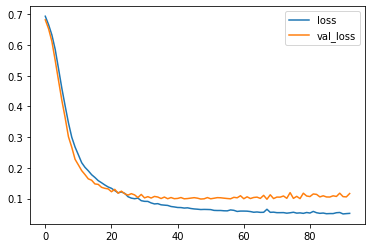

In [210]:
model_loss.plot()

In [212]:
pred = model.predict_classes(X_test)

In [215]:
from sklearn.metrics import classification_report,confusion_matrix

#### Predictions against Ground truth label

In [219]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [220]:
print(confusion_matrix(y_test,pred))

[[54  1]
 [ 2 86]]
